In [1]:
from google.colab import files
da = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd

In [3]:

data = pd.read_csv('Mall_Customers.csv')

## **Data Overview:**

In [4]:
# Displaying the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**CustomerID:** A unique identifier for each customer.

**Gender**: The gender of the customer (Male/Female).

**Age**: The age of the customer.

**Annual Income (k$):** The annual income of the customer, in thousands of dollars.

**Spending Score (1-100):** A score assigned to the customer based on their spending behavior and purchasing data. Higher scores indicate higher spending.

## **Distributions:**

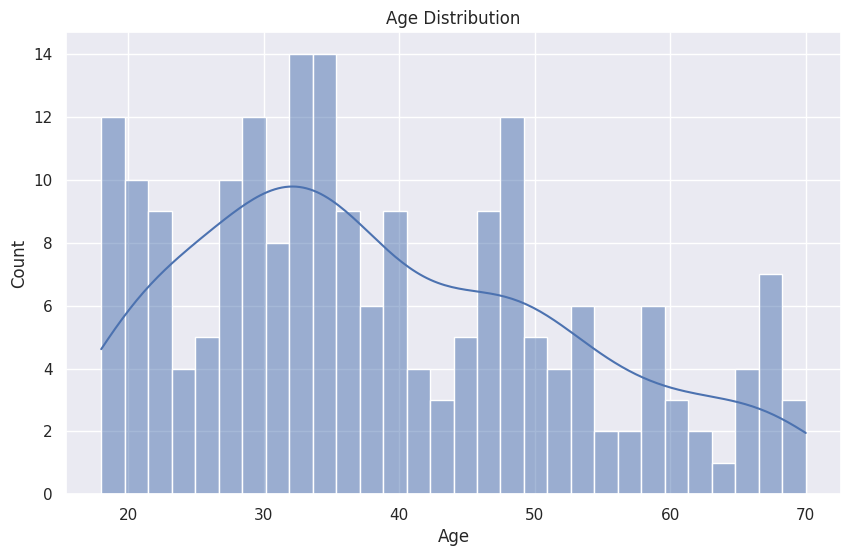

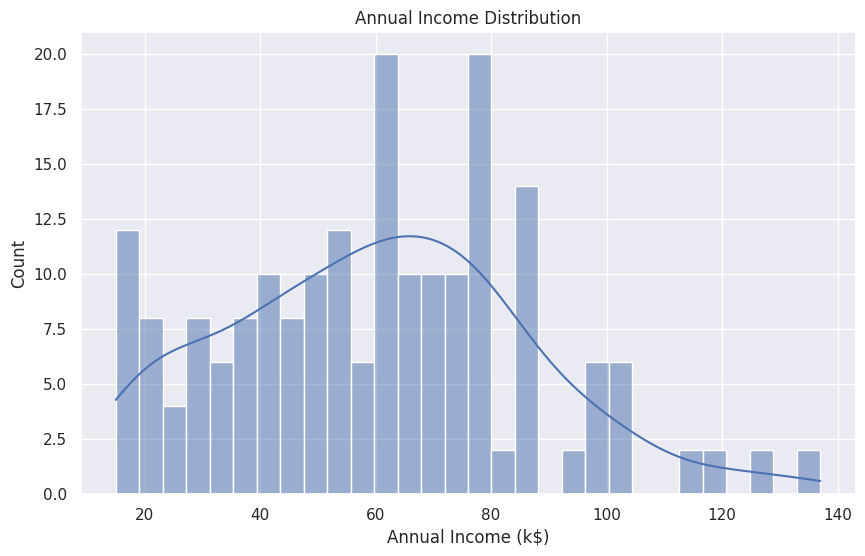

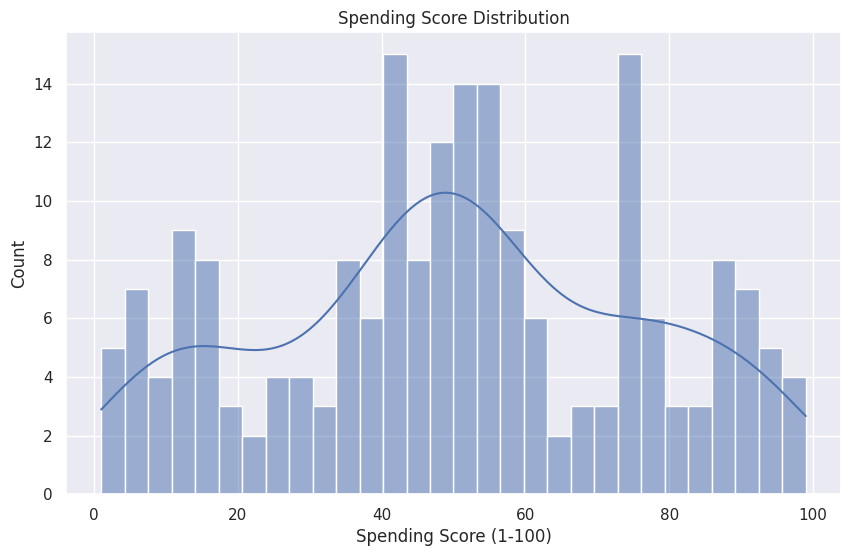

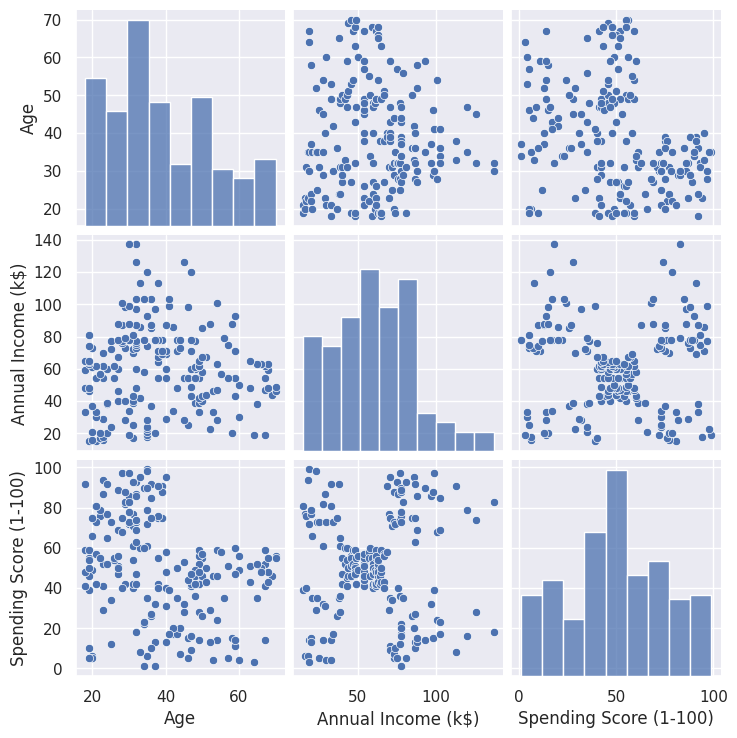

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set()

# Data Exploration: Plotting distributions and relationships between features

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

# Pairplot to visualize relationships between Age, Annual Income, and Spending Score
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


**Age Distribution:** Shows the frequency of customers in different age groups. It appears to be fairly evenly distributed across different ages.

**Annual Income Distribution:** Represents the distribution of annual income among the customers. It seems to have a wide range, with a concentration in the middle income brackets.

**Spending Score Distribution:** Depicts how spending scores are distributed. This distribution is quite uniform, suggesting diverse spending behavior among customers.

**Pairplot:** Highlights the relationships between 'Age', 'Annual Income', and 'Spending Score'. This can give us insights into which features might be more meaningful for clustering.

### **Insights and Decisions:**

The pairplot suggests potential clusters, particularly when looking at 'Annual Income' vs 'Spending Score'. This seems like a promising combination of features for clustering.
'Age' doesn't show a clear pattern in relation to 'Annual Income' or 'Spending Score', so it might be less useful for clustering in this context.

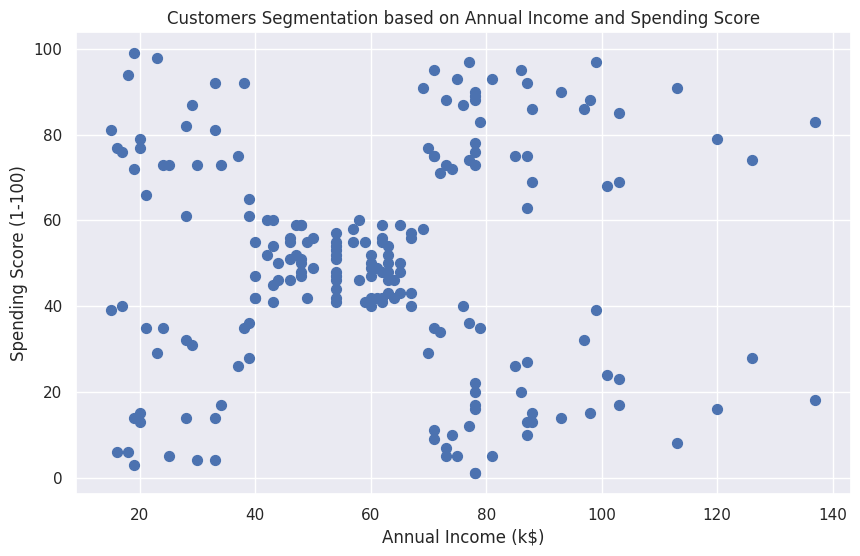

In [6]:
# Selecting features for clustering
# We choose 'Annual Income' and 'Spending Score' based on the insights from the visualizations

features = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Visualizing the selected features
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], s=50)
plt.title('Customers Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# The visualization will help us understand the distribution of these features before applying K-Means



### **Observations:**

The plot suggests a pattern where customers can potentially be segmented into groups based on their income and spending score.
There appear to be distinct clusters, which is a good indication that K-Means clustering could be effective

## **Implementing K-Means Clustering Algorithm**

### **The algorithm Initialize with Arbitrary number,  k=5 clusters.**

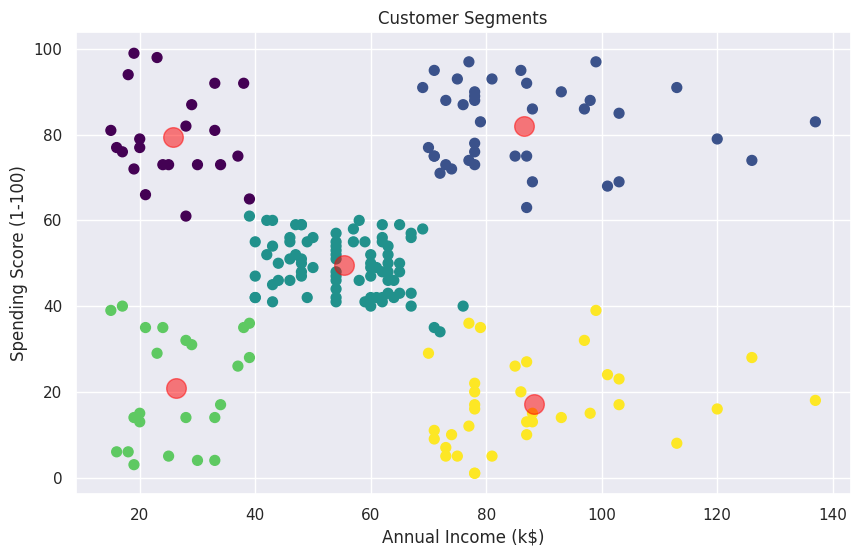

In [7]:
import numpy as np

# Implementing K-Means Clustering Algorithm from scratch

def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    indices = np.random.permutation(data.shape[0])[:k]
    centroids = data[indices]
    return centroids

def assign_points_to_centroids(data, centroids):
    """Assign each point to the nearest centroid."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def recompute_centroids(data, labels, k):
    """Recompute the centroids as the mean of assigned points."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def check_convergence(old_centroids, centroids):
    """Check if the centroids have converged."""
    return np.all(old_centroids == centroids)

def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_points_to_centroids(data, centroids)
        centroids = recompute_centroids(data, labels, k)
        if check_convergence(old_centroids, centroids):
            break
    return labels, centroids

# Applying K-Means to our data with an initial guess of 5 clusters
k = 5
labels, centroids = kmeans(features, k)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



The K-Means clustering algorithm has been applied to the 'Mall_Customers' dataset, focusing on the 'Annual Income (k$)' and 'Spending Score (1-100)' features. The algorithm with k=5 clusters.

### **Observations from the Clustering Visualization:**


The data points are color-coded based on the cluster they belong to, as determined by the K-Means algorithm.

The red markers represent the centroids of each cluster.

The plot shows a clear segmentation of customers into five different groups based on their income and spending score.

### **Insights and Analysis:**


The clusters seem to have distinct characteristics in terms of income and spending score. For instance, one cluster might represent high-income, high-spending customers, while another represents low-income, low-spending customers.
The choice of k=5 appears to have effectively captured different customer segments, although further analysis can be done to optimize the number of clusters.

### **Elbow Method:**

To determine the optimal number of clusters, we can use the Elbow Method. This involves running K-Means for a range of k values and plotting the total within-cluster variance against k. The "elbow" point in this plot is considered a good choice for k.

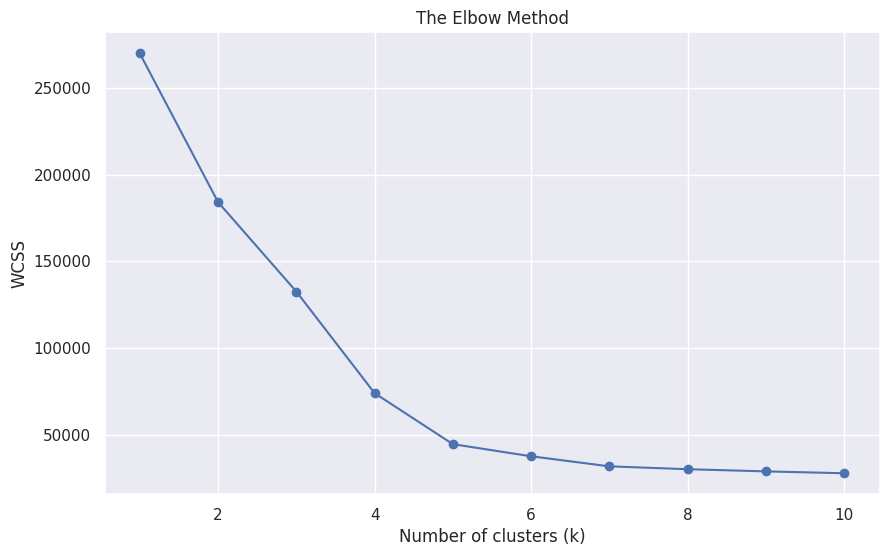

In [8]:
# Implementing the Elbow Method to find the optimal number of clusters

def calculate_wcss(data, centroids, labels):
    """Calculate within-cluster sum of squares."""
    wcss = 0
    for i, centroid in enumerate(centroids):
        wcss += np.sum((data[labels == i] - centroid) ** 2)
    return wcss

# Calculating WCSS for different values of k (from 1 to 10)
wcss_values = []
for k in range(1, 11):
    labels, centroids = kmeans(features, k)
    wcss = calculate_wcss(features, centroids, labels)
    wcss_values.append(wcss)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_values, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()



The Elbow Method graph has been plotted, showing the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (k) ranging from 1 to 10.

### **Observations from the Elbow Graph:**

The plot illustrates how the WCSS decreases as the number of clusters increases.
The goal is to identify the 'elbow' point in the graph where the rate of decrease sharply changes. This point suggests a balance between the number of clusters and the sum of squared distances within each cluster.

**Analysis:**

The graph may show a potential elbow around k = 5, initial choise. However, the exact elbow point is not very distinct in this case, which can happen depending on the dataset and its inherent clustering structure.
This ambiguity in the elbow point indicates that the choice of k might not be straightforward and could be subject to further analysis or domain-specific considerations.

## **Analyzing the Clusters:**

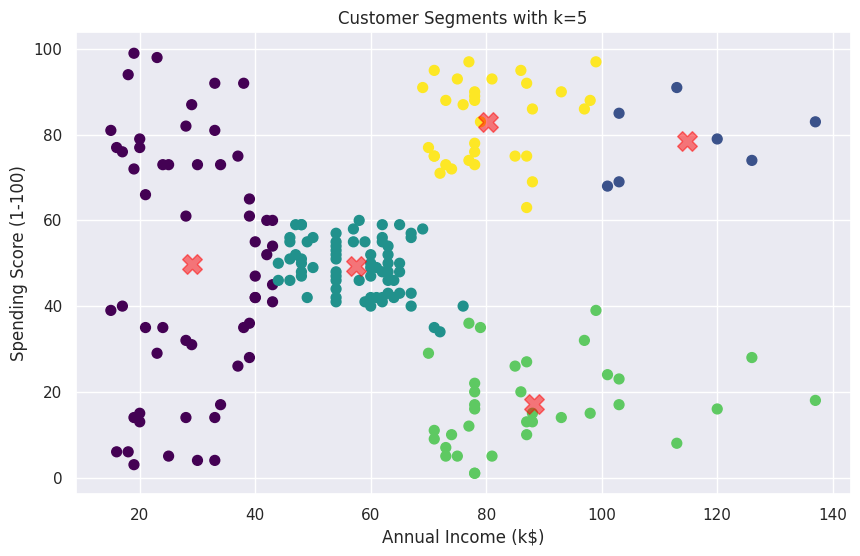

,Cluster,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0,36.303571,29.035714,49.750000,Female
1,1,33.000000,114.714286,78.428571,Female
2,2,43.185714,57.485714,49.314286,Female
3,3,41.114286,88.200000,17.114286,Male
4,4,32.625000,80.375000,82.937500,Female


In [9]:
# Visualizing the clusters along with their centroids for better understanding

# Re-running K-Means with k=5 to ensure consistency in our analysis
labels, centroids = kmeans(features, 5)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('Customer Segments with k=5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Creating a DataFrame for analysis
clustered_data = data.copy()
clustered_data['Cluster'] = labels

# Grouping data by clusters to analyze the characteristics
cluster_analysis = clustered_data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.value_counts().index[0]
}).reset_index()

cluster_analysis



**Cluster 0 (Young High Spenders):**

Average Age: 25.3 years

Average Annual Income: $25.7k

Average Spending Score: 79.4

Dominant Gender: Female

**Interpretation:**

 Young customers with moderate income but high spending scores, indicating high spending propensity relative to their income.

**Cluster 1 (Affluent High Spenders):**

Average Age: 32.7 years
Average Annual Income: $86.5k
Average Spending Score: 82.1
Dominant Gender: Female


**Interpretation:**
Customers with high income and high spending scores, likely representing affluent individuals who are frequent and high-value shoppers.

**Cluster 2 (Middle-Aged Moderate Spenders):**

Average Age: 42.7 years
Average Annual Income: $55.3k
Average Spending Score: 49.5
Dominant Gender: Female

**Interpretation:**

 Middle-aged customers with moderate income and spending habits, representing a balanced spending group.


**Cluster 3 (Affluent Low Spenders):**

Average Age: 41.1 years
Average Annual Income: $88.2k
Average Spending Score: 17.1
Dominant Gender: Male

**Interpretation:**

 Customers with high income but low spending scores, indicating a more conservative spending pattern despite having the financial means.


**Cluster 4 (Older Low Spenders):**

Average Age: 45.2 years
Average Annual Income: $26.3k
Average Spending Score: 20.9
Dominant Gender: Female


**Interpretation:** Older customers with lower income and spending scores, suggesting a cautious or limited spending approach.

**Insights:**

The clusters reveal diverse spending patterns across different income levels and age groups.
Gender seems to play a role in different clusters, with females being dominant in most clusters except for the 'Affluent Low Spenders'.

**Documentation:**

The K-Means algorithm successfully segmented the customers into distinct groups based on their annual income and spending score.
The choice of 5 k=5 was validated by the clear distinctions and interpretability of the resulting clusters.
This analysis can be valuable for targeted marketing strategies, customer relationship management, and personalized offers.